In [1]:
import xarray as xr
import fc as fc


In [2]:
inputDs = xr.open_dataset('chirps_climatology_monthly.nc')

In [3]:
inputDs

<xarray.Dataset>
Dimensions:    (latitude: 260, longitude: 380, time: 517)
Coordinates:
  * latitude   (latitude) float32 34.02 34.07 34.12 34.17 ... 46.87 46.92 46.97
  * longitude  (longitude) float32 1.025 1.075 1.125 1.175 ... 19.88 19.93 19.97
  * time       (time) datetime64[ns] 1981-01-31 1981-02-28 ... 2024-01-31
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2024-02-15
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [4]:
ncRawDataFileName_winter = "chirps_climatology.nc"
NcFileDoutput_winter_anomal = "chirps_climatology_AnomalyOutput.nc"

rawData_WINTER_anomaly = xr.open_dataset(ncRawDataFileName_winter)


In [5]:
winterAnomalyFile=fc.computeSenSlopeMap(ncRawDataFileName_winter,NcFileDoutput_winter_anomal)


Output: <xarray.Dataset>
Dimensions:    (latitude: 260, longitude: 380)
Coordinates:
  * latitude   (latitude) float32 34.02 34.07 34.12 34.17 ... 46.87 46.92 46.97
  * longitude  (longitude) float32 1.025 1.075 1.125 1.175 ... 19.88 19.93 19.97
Data variables:
    precip     (latitude, longitude) float64 -0.002627 -0.0001676 ... 0.1089


In [6]:
inputDs_c = xr.open_dataset('chirps_climatology_AnomalyOutput.nc')

In [7]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Theil Slopes: CHIRPS from 1981 to 2023')

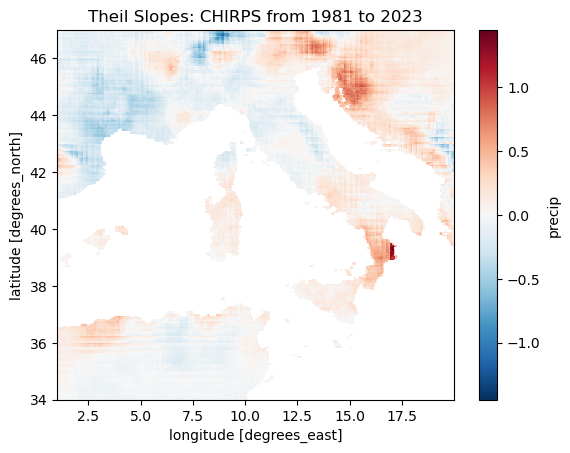

In [8]:
inputDs_c.precip.plot()

title = ("Theil Slopes: CHIRPS from 1981 to 2023")
plt.title(title)

In [9]:
import cartopy.feature as cfeature
import cartopy.crs as ccrs

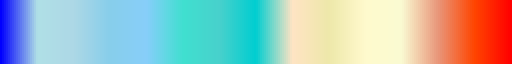

In [10]:
import matplotlib.colors

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["blue","powderblue","lightblue","skyblue","lightskyblue","turquoise","mediumturquoise","darkturquoise","bisque","palegoldenrod","lemonchiffon","lightgoldenrodyellow","darksalmon","orangered","red"]) 
cmap

In [11]:
# fig = plt.figure(figsize=(16, 8))
# ax = plt.subplot(projection=ccrs.PlateCarree())

# ax.coastlines(resolution='50m', color='black', linewidth=0.7)
# ax.add_feature(cfeature.BORDERS, edgecolor='black',linewidths=0.7,alpha=0.9999)
# ax.add_feature(cfeature.LAND)
# ax.add_feature(cfeature.OCEAN)

# tx = ax.gridlines(draw_labels = True)
# tx.xlabel_style = {'size': 16, 'color': 'k'}
# tx.ylabel_style = {'size': 16, 'color': 'k'}

# t_plot=inputDs_c.precip.plot(add_colorbar=False, cmap=cmap.reversed())

# tx.xlabels_top = False
# tx.ylabels_right = False

# title = ("Theil Slopes: CHIRPS from 1981 to 2023")
# plt.title(title)
# plt.tight_layout()

# cbar = plt.colorbar(t_plot,orientation='vertical', fraction=0.05, pad=0.05)
# cbar.set_label('Precipitation')

/home/ozlemozalp/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ozlemozalp/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


Text(0.5, 1.0, 'Theil Slopes: CHIRPS from 1981 to 2023')

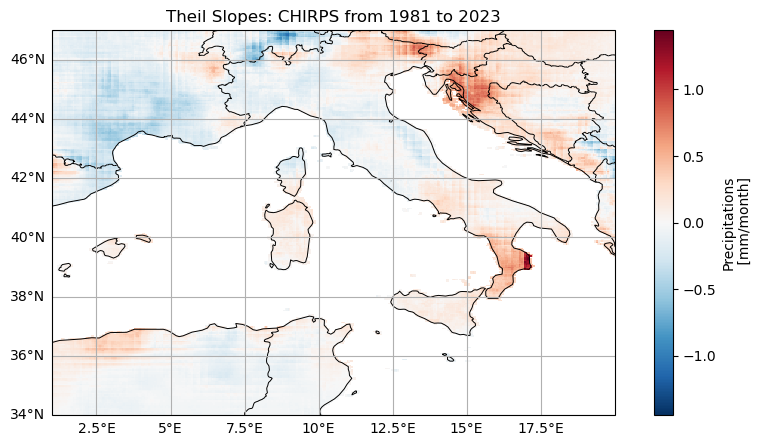

In [12]:
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=0.7)
ax.add_feature(cfeature.BORDERS, edgecolor='black',linewidths=0.7,alpha=0.9999)

# ax.add_feature(cfeature.LAND)
# ax.add_feature(cfeature.OCEAN)

tx = ax.gridlines(draw_labels = True)

t_plot=inputDs_c.precip.plot(add_colorbar=False)

tx.xlabels_top = False
tx.ylabels_right = False
cbar = plt.colorbar(t_plot,orientation='vertical', fraction=0.05, pad=0.05)
cbar.set_label('Precipitations\n [mm/month]')
title = ("Theil Slopes: CHIRPS from 1981 to 2023")
plt.title(title)

In [13]:
# month = inputDs.groupby('time.month').mean()
# may=month.precip[4]

# may_pr_lat_lon = may.mean(dim=('longitude', 'latitude'))
# precip_ts=np.array(may_pr_lat_lon)

# precip_ts


#may_2020= inputDs.precip.sel(time=slice('2020-05-01','2020-05-31 12:00'))
#tmp= tx.sel(time=slice('2007-01-01', '2020-12-31 12:00'))

In [14]:
# FROM_TIME='2020-05-01'
# TO_TIME='2020-05-31 12:00'
# may_2020= inputDs.precip.sel(time=slice(FROM_TIME,TO_TIME))


In [15]:
#may_2020

In [16]:
seasonal_ref_t = inputDs.precip.groupby(inputDs.precip["time"].dt.month).mean()
# seasonal_ref_mean_t = seasonal_ref_t.mean(dim=('longitude', 'latitude'))
# seasonal_ref_mean_t.plot (color='r', marker=".", markersize=10)
# plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['January', 'February', 'March','April','May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
seasonal_ref_t

<xarray.DataArray 'precip' (month: 12, latitude: 260, longitude: 380)>
array([[[23.749445, 23.549664, 25.5874  , ...,       nan,       nan,
               nan],
        [21.41118 , 22.178415, 24.346197, ...,       nan,       nan,
               nan],
        [22.42946 , 22.0947  , 24.207838, ...,       nan,       nan,
               nan],
        ...,
        [63.473312, 65.49684 , 64.58485 , ..., 26.257557, 26.432274,
         25.755579],
        [64.77381 , 64.40557 , 63.585434, ..., 25.926794, 25.943007,
         25.189339],
        [61.475586, 61.209152, 62.82737 , ..., 25.727283, 25.6873  ,
         25.75576 ]],

       [[20.49688 , 20.555798, 21.451038, ...,       nan,       nan,
               nan],
        [20.50078 , 20.626766, 21.487131, ...,       nan,       nan,
               nan],
        [19.774134, 20.631046, 21.31165 , ...,       nan,       nan,
               nan],
...
        [63.667572, 64.876114, 64.91116 , ..., 42.172516, 41.98629 ,
         41.671795],
        [63.567036, 62.953705, 62.67255 , ..., 42.576477, 42.648033,
         41.382378],
        [60.477867, 60.78825 , 62.29862 , ..., 41.978466, 42.205894,
         40.857327]],

       [[20.958042, 21.81363 , 21.74239 , ...,       nan,       nan,
               nan],
        [22.383797, 23.145975, 23.349224, ...,       nan,       nan,
               nan],
        [22.799992, 23.726082, 24.036291, ...,       nan,       nan,
               nan],
        ...,
        [71.12289 , 72.72477 , 73.88347 , ..., 46.40671 , 47.397526,
         46.377834],
        [73.25026 , 72.04027 , 70.63145 , ..., 45.125885, 46.124485,
         44.945763],
        [69.45824 , 69.68445 , 70.595695, ..., 42.683254, 42.827072,
         43.67555 ]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 34.02 34.07 34.12 34.17 ... 46.87 46.92 46.97
  * longitude  (longitude) float32 1.025 1.075 1.125 1.175 ... 19.88 19.93 19.97
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    units:               mm/month
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    time_step:           month
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

In [17]:
MONTH=4
FROM_TIME='2020-05-01'
TO_TIME='2020-05-31'

In [18]:
m=fc.computeAnomaly(FROM_TIME,TO_TIME,MONTH)


Insert to select a date from time: 2020-05-01
Insert to select a date to time: 2020-05-31
Insert a Month to calculate Anomaly: 4


In [19]:
m

('2020-05-01', '2020-05-31', 4)

In [20]:
may_2020= inputDs.precip.sel(time=slice(m[0],m[1]))


In [21]:
may_2020

<xarray.DataArray 'precip' (time: 1, latitude: 260, longitude: 380)>
[98800 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 34.02 34.07 34.12 34.17 ... 46.87 46.92 46.97
  * longitude  (longitude) float32 1.025 1.075 1.125 1.175 ... 19.88 19.93 19.97
  * time       (time) datetime64[ns] 2020-05-31
Attributes:
    units:               mm/month
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    time_step:           month
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

In [22]:
m[2]

4

In [23]:
anomaly=seasonal_ref_t[(seasonal_ref_t['month'] == m[2])]

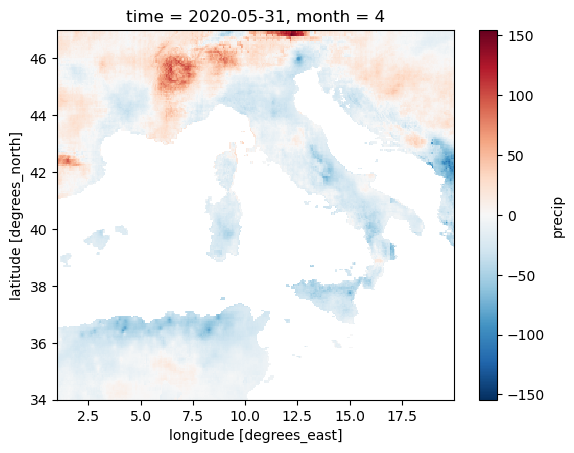

In [24]:
anomaly_may=may_2020-anomaly

anomaly_may.plot()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error

2024-03-12 12:25:54.079675: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-12 12:25:54.145182: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-12 12:25:54.466490: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 12:25:54.466528: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 12:25:54.536814: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [26]:
#months_ref_t = inputDs.precip#.groupby(inputDs.precip["time"].dt.month)
months_ref_t= inputDs.precip.sel(time=slice('1981-01-01','2022-12-31'))


In [27]:
months_ref_t

may_dim_mean=months_ref_t.mean(dim=('longitude', 'latitude'))
may_dim_mean

<xarray.DataArray 'precip' (time: 504)>
array([ 57.494373 ,  48.71801  ,  66.48098  ,  46.50163  ,  69.133835 ,
        64.343925 ,  51.055588 ,  40.152546 ,  96.194885 ,  74.45662  ,
        30.618757 , 125.05838  ,  53.23822  ,  48.444534 ,  68.84534  ,
        45.689777 ,  53.377453 ,  49.712944 ,  48.556892 ,  62.88914  ,
        64.46409  ,  99.24055  , 113.78527  , 103.07432  ,  24.18132  ,
        55.232674 ,  64.09976  ,  58.18797  ,  69.3455   ,  54.65821  ,
        28.142653 ,  56.55413  ,  54.199287 ,  55.12102  ,  53.359947 ,
        68.85697  ,  67.52388  ,  70.04566  ,  57.887302 ,  52.138283 ,
        96.648506 ,  49.245224 ,  25.113842 ,  67.52024  ,  84.69081  ,
        81.06093  ,  84.625015 ,  64.651634 ,  69.84487  ,  43.0759   ,
        94.37324  ,  52.210213 ,  80.51303  ,  55.230846 ,  32.421715 ,
        41.918663 ,  28.667387 ,  43.771492 ,  97.20538  ,  58.16186  ,
        86.29391  ,  83.117775 ,  76.36194  ,  81.50212  ,  52.307163 ,
        61.748802 ,  38.97005  ,  44.32125  ,  56.581867 ,  63.34303  ,
        54.544815 ,  55.222733 ,  70.09279  ,  75.84551  ,  50.15566  ,
        51.140194 ,  70.93784  ,  56.466713 ,  52.930744 ,  45.92909  ,
        48.213104 , 101.83402  ,  92.44926  ,  56.73138  ,  72.11587  ,
        57.21347  ,  70.91065  ,  68.92799  ,  74.83632  ,  61.146877 ,
        32.191345 ,  41.92956  ,  55.235954 ,  77.59564  ,  49.34636  ,
        52.054924 ,  21.002836 ,  38.234184 ,  42.313374 ,  93.92053  ,
...
        63.11465  , 122.09422  ,  73.70683  ,  69.04073  ,  74.198555 ,
        67.843605 ,  43.45189  ,  58.491673 ,  52.29109  ,  29.80592  ,
        61.40916  ,  70.21818  , 103.55639  ,  50.883842 ,  13.9815445,
        61.000175 ,  90.684616 ,  66.1808   ,  61.881332 ,  83.00323  ,
        64.97383  ,  43.579624 ,  42.23489  ,  62.334915 ,  79.43271  ,
        90.393875 ,  30.809109 ,  53.353085 ,  53.354794 ,  49.852623 ,
        50.97983  ,  52.72327  ,  54.61097  ,  36.53922  ,  35.39194  ,
        78.61439  ,  39.76858  ,  78.222984 ,  90.1205   ,  65.84056  ,
        63.59536  ,  98.49999  ,  62.12394  ,  83.81342  ,  60.397133 ,
        43.90482  ,  56.989574 ,  44.142097 ,  98.66713  ,  81.495964 ,
        53.84241  ,  56.161552 ,  41.12711  ,  38.602245 ,  71.59411  ,
        82.215935 ,  42.55323  ,  53.565212 ,  44.47733  ,  61.49562  ,
        69.92625  , 153.30353  ,  84.92571  ,  30.754362 ,  29.90637  ,
        57.508793 ,  53.748283 ,  58.222126 ,  64.99283  ,  35.395138 ,
        64.64436  ,  68.669464 ,  94.165634 ,  39.38537  , 112.06623  ,
        85.93138  ,  44.924618 ,  39.604588 ,  50.997005 ,  68.282814 ,
        42.96316  ,  51.704567 ,  38.350372 ,  56.115723 ,  60.227966 ,
        90.98042  ,  76.37391  ,  27.030695 ,  30.882593 ,  49.74189  ,
        59.55338  ,  46.828876 ,  50.085323 ,  27.135504 ,  48.297222 ,
        91.731415 ,  43.78214  ,  86.76644  ,  73.748436 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1981-01-31 1981-02-28 ... 2022-12-31

In [28]:
#monthly_ref_mean_pr=inputDs.precip

#monthly_ref_mean_pr_lat_lon = monthly_ref_mean_pr.mean(dim=('longitude', 'latitude'))


In [29]:
precip_ts=np.array(may_dim_mean)

In [30]:
#precip_ts

In [31]:
import pandas as pd

pd.DataFrame(precip_ts).to_csv("precip_monthly_may_ts.csv", index=False)

In [2]:
df2 = pd.read_csv('precip_monthly_may_ts.csv')


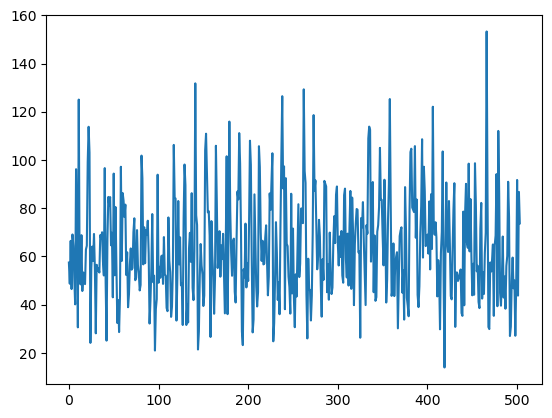

In [3]:
plt.plot(df2)

In [4]:
scaler = MinMaxScaler()
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))
df2.shape

(504, 1)

In [5]:
train_size = int(len(df2)*0.75)
test_size = len(df2) - train_size
train_data,test_data = df2[0:train_size,:],df2[train_size:len(df2),:1] 

In [6]:
train_size,test_size

(378, 126)

In [7]:
def create_dataset(dataset, time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
                   a = dataset[i:(i+time_step),0]
                   dataX.append(a)
                   dataY.append(dataset[i + time_step,0])
    return np.array(dataX),np.array(dataY)

In [8]:
time_step = 10
X_train,Y_train =  create_dataset(train_data,time_step)
X_test,Y_test =  create_dataset(test_data,time_step)

In [9]:
print(X_train.shape)
print(X_train)
print(X_test.shape)
print(Y_test.shape)

(367, 10)
[[0.31231846 0.24932508 0.3768209  ... 0.18784545 0.59009596 0.43406699]
 [0.24932508 0.3768209  0.23341675 ... 0.59009596 0.43406699 0.11941556]
 [0.3768209  0.23341675 0.39586208 ... 0.43406699 0.11941556 0.7972671 ]
 ...
 [0.30452531 0.32886326 0.34305989 ... 0.41711633 0.22268176 0.28995456]
 [0.32886326 0.34305989 0.11647404 ... 0.22268176 0.28995456 0.14248548]
 [0.34305989 0.11647404 0.25635448 ... 0.28995456 0.14248548 0.53681237]]
(115, 10)
(115,)


In [10]:
model = Sequential()
model.add(LSTM(150,return_sequences = True,input_shape = (X_train.shape[1],1)))
model.add(LSTM(150,return_sequences = True))
model.add(LSTM(150))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')

In [11]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 150)           91200     
                                                                 
 lstm_1 (LSTM)               (None, 10, 150)           180600    
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 452551 (1.73 MB)
Trainable params: 452551 (1.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
epoch=300
batchSize=64
verbose=1

In [12]:
model

In [12]:
history=model.fit(X_train,Y_train,validation_data = (X_test,Y_test),epochs = 800,batch_size = 64,verbose = 1)


Epoch 1/800
6/6 [==============================] - 3s 166ms/step - loss: 0.0770 - val_loss: 0.0364
Epoch 2/800
6/6 [==============================] - 0s 27ms/step - loss: 0.0328 - val_loss: 0.0302
Epoch 3/800
6/6 [==============================] - 0s 27ms/step - loss: 0.0298 - val_loss: 0.0294
Epoch 4/800
6/6 [==============================] - 0s 26ms/step - loss: 0.0269 - val_loss: 0.0274
Epoch 5/800
6/6 [==============================] - 0s 29ms/step - loss: 0.0270 - val_loss: 0.0270
Epoch 6/800
6/6 [==============================] - 0s 33ms/step - loss: 0.0265 - val_loss: 0.0263
Epoch 7/800
6/6 [==============================] - 0s 32ms/step - loss: 0.0264 - val_loss: 0.0261
Epoch 8/800
6/6 [==============================] - 0s 29ms/step - loss: 0.0260 - val_loss: 0.0269
Epoch 9/800
6/6 [==============================] - 0s 28ms/step - loss: 0.0261 - val_loss: 0.0261
Epoch 10/800
6/6 [==============================] - 0s 28ms/step - loss: 0.0257 - val_loss: 0.0271
Epoch 11/800
6/6 [

In [13]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

4/4 [==============================] - 0s 6ms/step


In [14]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [15]:
print("Training:",math.sqrt(mean_squared_error(Y_train,train_predict)))
print("Test:",math.sqrt(mean_squared_error(Y_test,test_predict)))

Training: 66.58602050841206
Test: 64.17210343579617


In [32]:
look_back = 10


In [33]:
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back : len(train_predict)+look_back,:] = train_predict

In [34]:
testPredictPlot = np.empty_like(df2)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back)*2 + 1 : len(df2) - 1,:] = test_predict

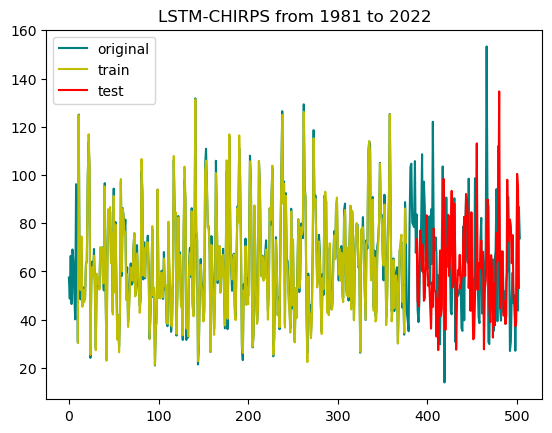

In [19]:
import matplotlib.pyplot as plt

plt.plot(scaler.inverse_transform(df2),color='teal')
plt.plot(trainPredictPlot,color='y')
plt.plot(testPredictPlot,color='r')
plt.title("LSTM-CHIRPS from 1981 to 2022")
plt.legend(['original', 'train','test'], loc='best')


plt.show()

In [20]:
#print(history.history['loss'])
#print(history.history['val_loss'])

In [21]:
from matplotlib import pyplot


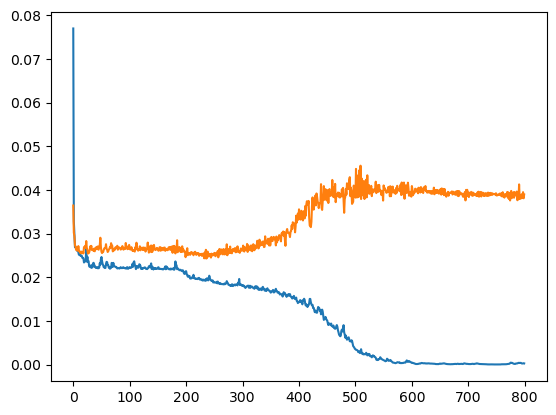

In [22]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])